In [1]:
# stephanie's sandbox
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
import plotly.express as px


## Functions
#### Importing, cleaning and sanitizing data

In [2]:
def clean_raw_data(clean_df, raw_data_file, skip):
    raw_data = pd.read_csv(raw_data_file, sep='\t', header=None, skiprows=skip, encoding='latin-1')
    data_col = raw_data[0]

    for row in range(0, len(data_col)):

        data_row = list(map(str, data_col[row].split())) # reformat to make string into list delimited by spaces
        
        add_row = {} # initialize, and clear dictionary for each row

        for i in range(0, len(data_row)):
            add_row = {'year': data_row[0], 
                'month': data_row[1],
                'timestamp': pd.Timestamp(year=int(data_row[0]), month=int(data_row[1]), day=1),
                'monthly_anom': data_row[2],
                'monthly_unc': data_row[3], 
                'one_yr_anom': data_row[4], 
                'one_yr_unc': data_row[5], 
                'five_yr_anom': data_row[6], 
                'five_yr_unc': data_row[7], 
                'ten_yr_anom': data_row[8], 
                'ten_yr_unc': data_row[9], 
                'twenty_yr_anom': data_row[10], 
                'twenty_yr_unc': data_row[11]}

        clean_df = clean_df._append(add_row, ignore_index=True) # append is being depricated, todo: use concat or merge

    # cast year and  month as  int - todo, make timestamp
    clean_df['year'] = clean_df['year'].astype(int)
    clean_df['month'] = clean_df['month'].astype(int)

    # cast weather data (columns 2-5) as floats
    clean_df['monthly_anom'] = clean_df['monthly_anom'].astype(float)
    clean_df['monthly_unc'] = clean_df['monthly_unc'].astype(float)
    clean_df['one_yr_anom'] = clean_df['one_yr_anom'].astype(float)
    clean_df['one_yr_unc'] = clean_df['one_yr_unc'].astype(float)

    clean_df['five_yr_anom'] = clean_df['five_yr_anom'].astype(float)
    clean_df['five_yr_unc'] = clean_df['five_yr_unc'].astype(float) 

    clean_df['ten_yr_anom'] = clean_df['ten_yr_anom'].astype(float)
    clean_df['ten_yr_unc']  = clean_df['ten_yr_unc'].astype(float)   

    clean_df['twenty_yr_anom'] = clean_df['twenty_yr_anom'].astype(float)
    clean_df['twenty_yr_unc']  = clean_df['twenty_yr_unc'].astype(float)  

    # filter data to years after 1960
    clean_df = clean_df[clean_df['year'] >= 1960]
    # clean_df = clean_df[clean_df['year'] >= 1900]
  
    return clean_df

In [3]:
def get_season_df(df, season):
    summer_months = [1, 2, 12]
    autumn_months = [3, 4, 5]
    winter_months = [6, 7, 8]
    spring_months = [9, 10,11]

    if season == 'summer':
        season_df = df[df['month'].isin(summer_months)]
    elif season == 'autumn':
        season_df = df[df['month'].isin(autumn_months)]
    elif season == 'winter':
        season_df = df[df['month'].isin(winter_months)]
    elif season == 'spring':
        season_df = df[df['month'].isin(spring_months)]
    else: 
        print('Invalid season')
        return df

    return season_df

#### Constants

In [4]:
# files and constants
south_america_file = 'SouthAmerica_raw.txt'
lima_file = 'Lima_Peru_raw.txt'
santiago_file = 'Santiago_Chile_raw.txt'
saopaulo_file = 'SaoPaulo_Brazil_raw.txt'

weather_cols = ['year', 'month', 'monthly_anom', 'monthly_unc', 'one_yr_anom', 'one_yr_unc']


In [5]:
# clean data
south_data = pd.DataFrame(columns=weather_cols)
south_data = clean_raw_data(south_data, south_america_file, 71)

lima_data = pd.DataFrame(columns=weather_cols)
lima_data = clean_raw_data(lima_data, lima_file, 71)

santiago_data = pd.DataFrame(columns=weather_cols)
santiago_data = clean_raw_data(santiago_data, santiago_file, 69)

saopaulo_data = pd.DataFrame(columns=weather_cols)
saopaulo_data = clean_raw_data(saopaulo_data, saopaulo_file, 69)

In [6]:
south_data.shape
lima_data.shape
santiago_data.shape
saopaulo_data.shape

south_data.describe()
lima_data.describe()
santiago_data.describe()
saopaulo_data.describe()

year       month  monthly_anom  monthly_unc  one_yr_anom  \
count   732.000000  732.000000    732.000000   732.000000   726.000000   
mean   1990.000000    6.500000      0.468663     0.347769     0.463415   
std      17.618856    3.454413      0.983454     0.128958     0.507106   
min    1960.000000    1.000000     -2.329000     0.105000    -1.101000   
25%    1975.000000    3.750000     -0.222250     0.255750     0.115250   
50%    1990.000000    6.500000      0.463500     0.326000     0.465500   
75%    2005.000000    9.250000      1.131000     0.415000     0.814000   
max    2020.000000   12.000000      3.537000     0.956000     1.773000   

       one_yr_unc  five_yr_anom  five_yr_unc  ten_yr_anom  ten_yr_unc  \
count  726.000000    702.000000   702.000000   672.000000  672.000000   
mean     0.162018      0.441259     0.107046     0.405512    0.088048   
std      0.059800      0.362597     0.034028     0.319465    0.030118   
min      0.058000     -0.183000     0.032000    -0.139000    0.020000   
25%      0.125000      0.146000     0.086000     0.142750    0.069000   
50%      0.156000      0.357500     0.102500     0.352000    0.093000   
75%      0.190000      0.723500     0.134000     0.679000    0.111000   
max      0.402000      1.276000     0.183000     1.117000    0.149000   

       twenty_yr_anom  twenty_yr_unc  
count      612.000000     612.000000  
mean         0.354521       0.066975  
std          0.282756       0.022009  
min         -0.093000       0.033000  
25%          0.104000       0.056000  
50%          0.322000       0.062000  
75%          0.572750       0.071000  
max          0.951000       0.122000

In [7]:
# get season data

# summer
south_america_summer = get_season_df(south_data, 'summer')
lima_summer = get_season_df(lima_data, 'summer')
santiago_summer = get_season_df(santiago_data, 'summer')
saopaulo_summer = get_season_df(saopaulo_data, 'summer')

# autumn
south_america_autumn = get_season_df(south_data, 'autumn')
lima_autumn = get_season_df(lima_data, 'autumn')
santiago_autumn = get_season_df(santiago_data, 'autumn')
saopaulo_autumn = get_season_df(saopaulo_data, 'autumn')

# winter
south_america_winter = get_season_df(south_data, 'winter')
lima_winter = get_season_df(lima_data, 'winter')
santiago_winter = get_season_df(santiago_data, 'winter')
saopaulo_winter = get_season_df(saopaulo_data, 'winter')

# spring
south_america_spring = get_season_df(south_data, 'spring')
lima_spring = get_season_df(lima_data, 'spring')
santiago_spring = get_season_df(santiago_data, 'spring')
saopaulo_spring = get_season_df(saopaulo_data, 'spring')

In [8]:
def graph_time_period(anom, unc):

    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(10,12), sharex=True, sharey=True)
    # fig.suptitle('Vertically stacked subplots')
    ax1.plot(south_data.year, south_data.one_yr_anom, color='royalblue', label='anomaly')
    ax1.fill_between(south_data.year, 
                    south_data['one_yr_anom'] - south_data['one_yr_unc'], 
                    south_data['one_yr_anom'] + south_data['one_yr_unc'], 
                    color='royalblue', alpha=0.2, label='Uncertainty')
    ax1.legend()

    ax2.plot(lima_data.year, lima_data.one_yr_anom, color='peru', label='anomaly')
    ax2.fill_between(lima_data.year, 
                    lima_data['one_yr_anom'] - lima_data['one_yr_unc'], 
                    lima_data['one_yr_anom'] + lima_data['one_yr_unc'], 
                    color='peru', alpha=0.2, label='Uncertainty')
    ax2.legend()

    ax3.plot(santiago_data.year, santiago_data.one_yr_anom, color='red', label='anomaly')
    ax3.fill_between(santiago_data.year, 
                    santiago_data['one_yr_anom'] - santiago_data['one_yr_unc'], 
                    santiago_data['one_yr_anom'] + santiago_data['one_yr_unc'], 
                    color='red', alpha=0.2, label='Uncertainty')
    ax3.legend()

    ax4.plot(saopaulo_data.year, saopaulo_data.one_yr_anom, color = 'green', label='anomaly')
    ax4.fill_between(saopaulo_data.year, 
                    saopaulo_data['one_yr_anom'] - saopaulo_data['one_yr_unc'], 
                    saopaulo_data['one_yr_anom'] + saopaulo_data['one_yr_unc'], 
                    color='green', alpha=0.2, label='Uncertainty')
    ax4.legend()

    ax1.set_title('South America')
    ax2.set_title('Lima, Peru')
    ax3.set_title('Santiago, Chile')
    ax4.set_title('Sao Paulo, Brazil')

    ax1.set_ylabel('one year anomaly')
    ax2.set_ylabel('one year anomaly')
    ax3.set_ylabel('one year anomaly')
    ax4.set_ylabel('one year anomaly')

    ax4.set_xlabel('year')


In [9]:
south_america_autumn['five_yr_anom'].mean()

0.3706158192090396

### Initial Exploration

In [10]:
def plot_region_anom(region_data, chart_title):
    fig, ax = plt.subplots(figsize=(12,9))

    plt.plot(region_data['timestamp'], region_data['monthly_anom'], label='monthly', color='cyan')

    plt.plot(region_data['timestamp'], region_data['one_yr_anom'], label='1-yr', color='royalblue')
    plt.plot(region_data['timestamp'], region_data['five_yr_anom'], label='5-yr', color='darkorange')
    plt.plot(region_data['timestamp'], region_data['ten_yr_anom'], label='10-yr', color='green')
    plt.plot(region_data['timestamp'], region_data['twenty_yr_anom'], label='20-yr', color='red')

    plt.title(chart_title)
    plt.xlabel('Year')
    plt.ylabel('Anomaly')
    plt.legend()
    plt.grid()

    plt.show()

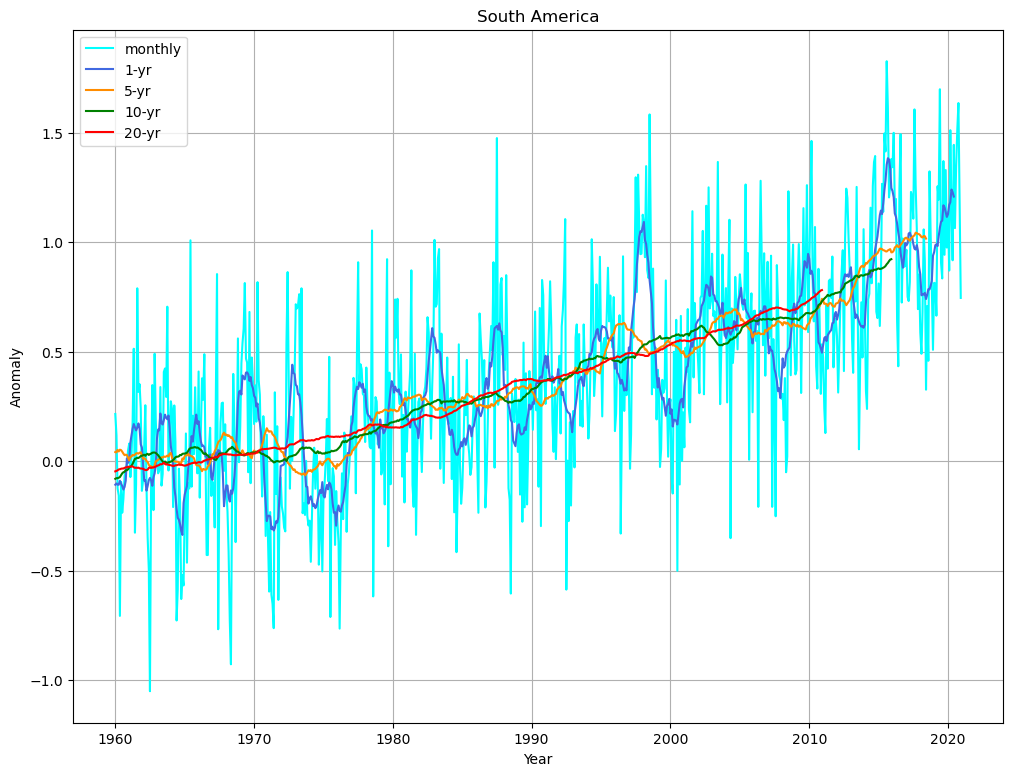

In [11]:
plot_region_anom(south_data, 'South America')

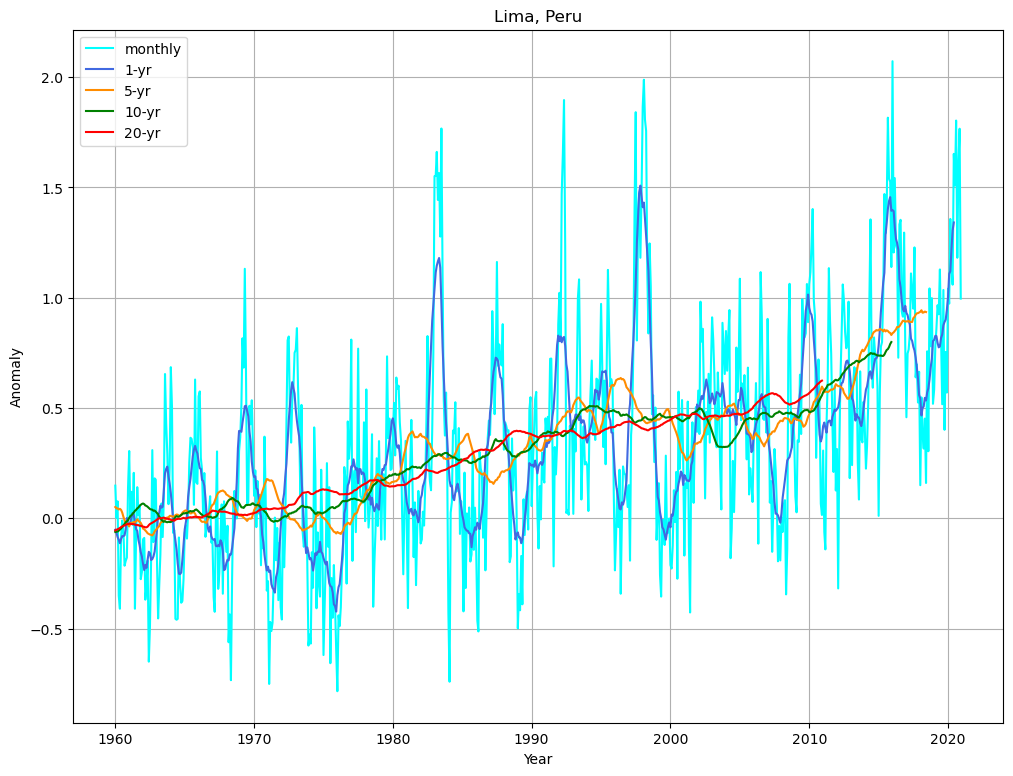

In [12]:
plot_region_anom(lima_data, 'Lima, Peru')

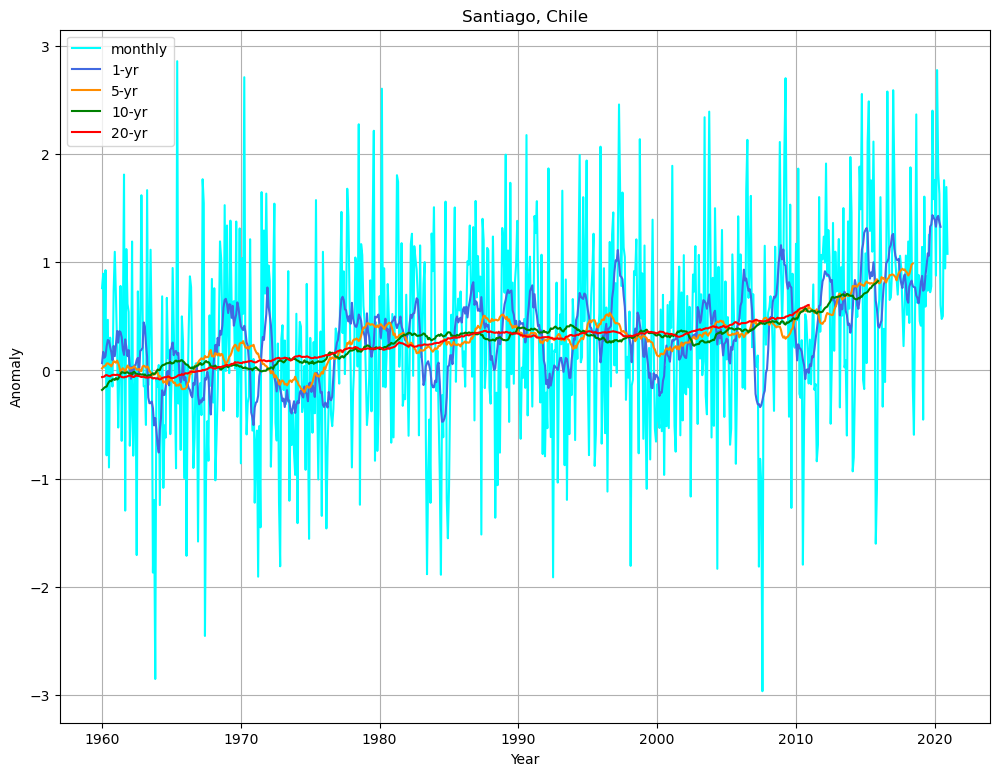

In [13]:
plot_region_anom(santiago_data, 'Santiago, Chile')

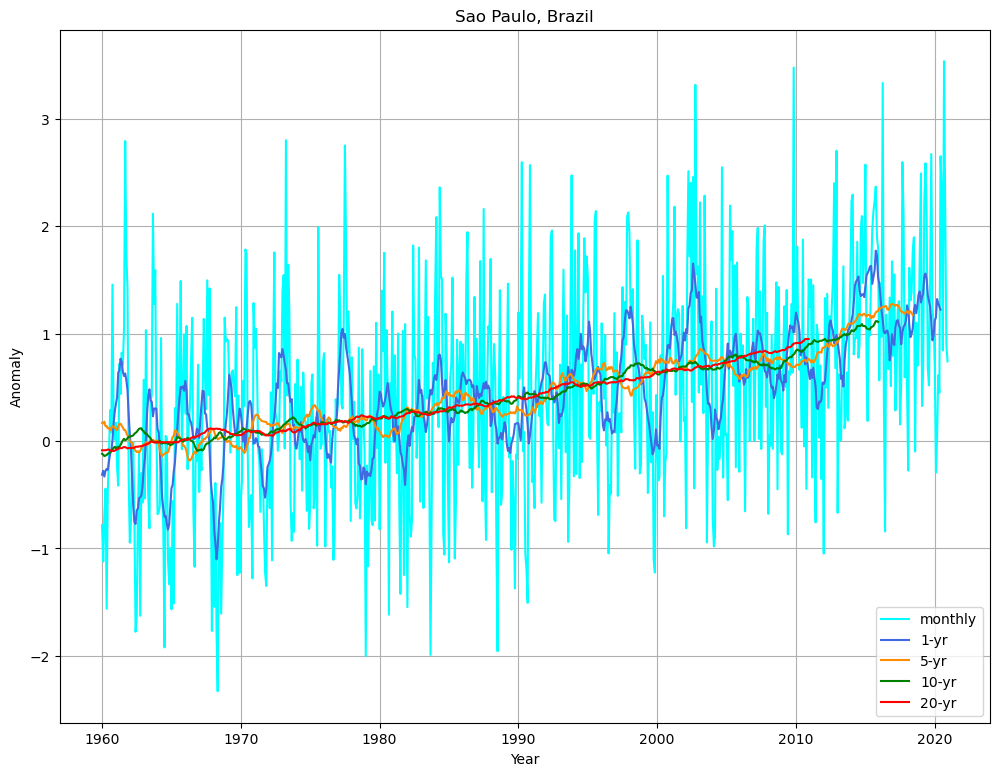

In [14]:
plot_region_anom(saopaulo_data, 'Sao Paulo, Brazil')

In [15]:

def plot_region_uncertainty(region_data, chart_title):
    fig, ax = plt.subplots(figsize=(12,9))

    plt.plot(region_data['timestamp'], region_data['one_yr_anom'], label='1-yr', color='royalblue')
    plt.fill_between(region_data.timestamp,
                    region_data['one_yr_anom'] - region_data['one_yr_unc'], 
                    region_data['one_yr_anom'] + region_data['one_yr_unc'], 
                    color='royalblue', alpha=0.2, label='1-yr uncertainty')


    plt.plot(region_data['timestamp'], region_data['five_yr_anom'], label='5-yr', color='orange')
    plt.fill_between(region_data.timestamp,
                    region_data['five_yr_anom'] - region_data['five_yr_unc'], 
                    region_data['five_yr_anom'] + region_data['five_yr_unc'], 
                    color='orange', alpha=0.2, label='1-yr uncertainty')

    plt.plot(region_data['timestamp'], region_data['ten_yr_anom'], label='10-yr', color='green')
    plt.fill_between(region_data.timestamp,
                    region_data['ten_yr_anom'] - region_data['ten_yr_unc'], 
                    region_data['ten_yr_anom'] + region_data['ten_yr_unc'], 
                    color='green', alpha=0.2, label='1-yr uncertainty')

    plt.plot(region_data['timestamp'], region_data['twenty_yr_anom'], label='20-yr', color='red')
    plt.fill_between(region_data.timestamp,
                    region_data['twenty_yr_anom'] - region_data['twenty_yr_unc'], 
                    region_data['twenty_yr_anom'] + region_data['twenty_yr_unc'], 
                    color='red', alpha=0.2, label='1-yr uncertainty')
    plt.legend(loc=2)

    # plt.grid()
    plt.title(chart_title)
    plt.ylabel('anomaly and Uncertainty')
    plt.xlabel('Year')

    plt.show()



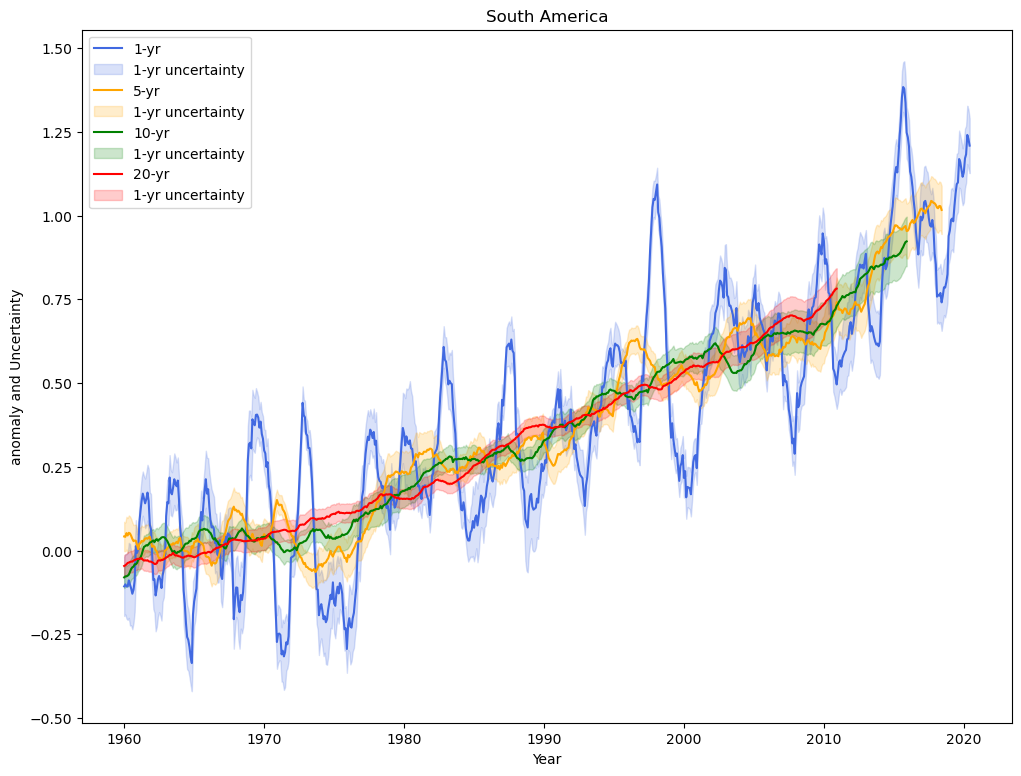

In [16]:
plot_region_uncertainty(south_data, 'South America')

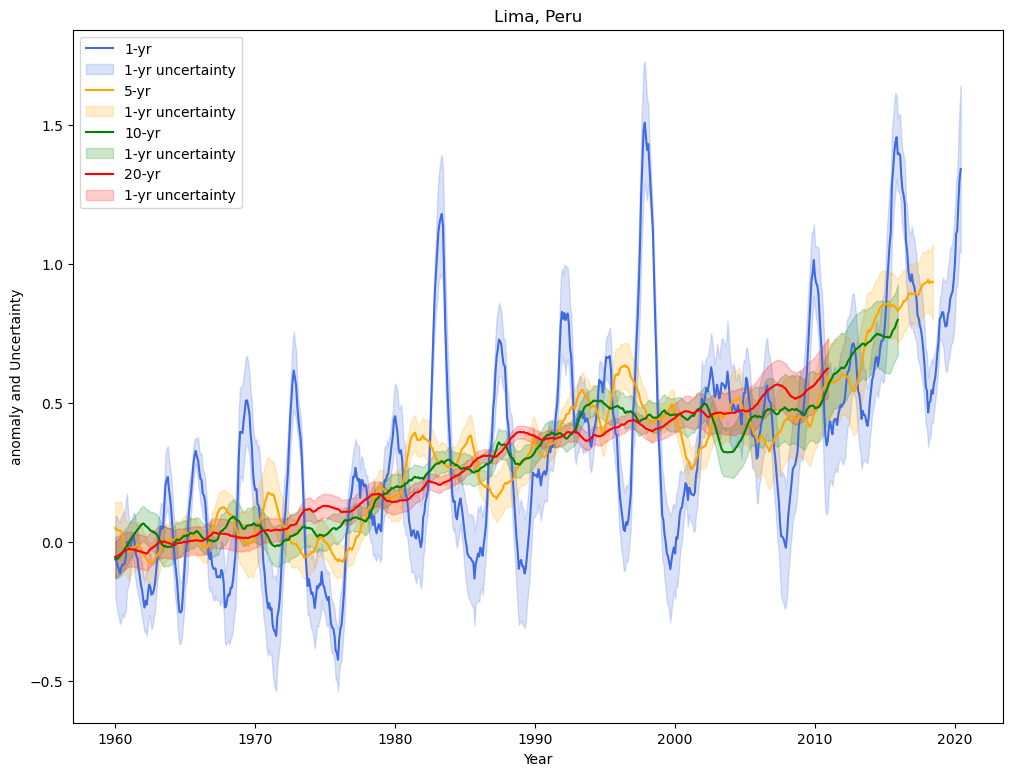

In [17]:
plot_region_uncertainty(lima_data, 'Lima, Peru')

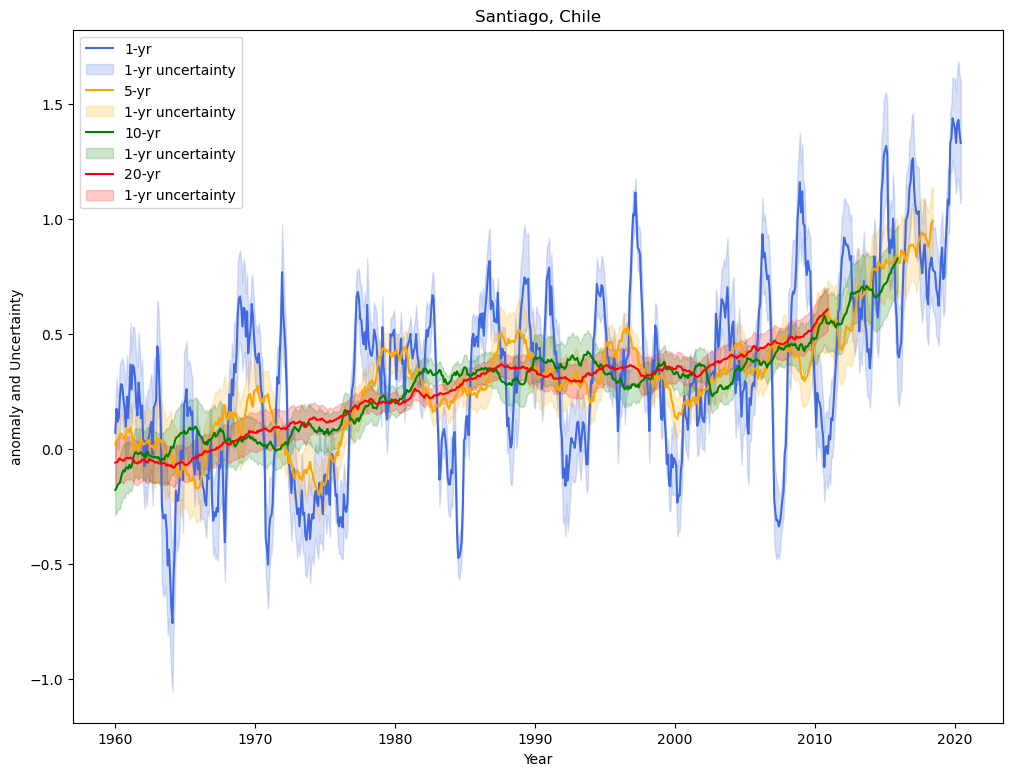

In [18]:
plot_region_uncertainty(santiago_data, 'Santiago, Chile')

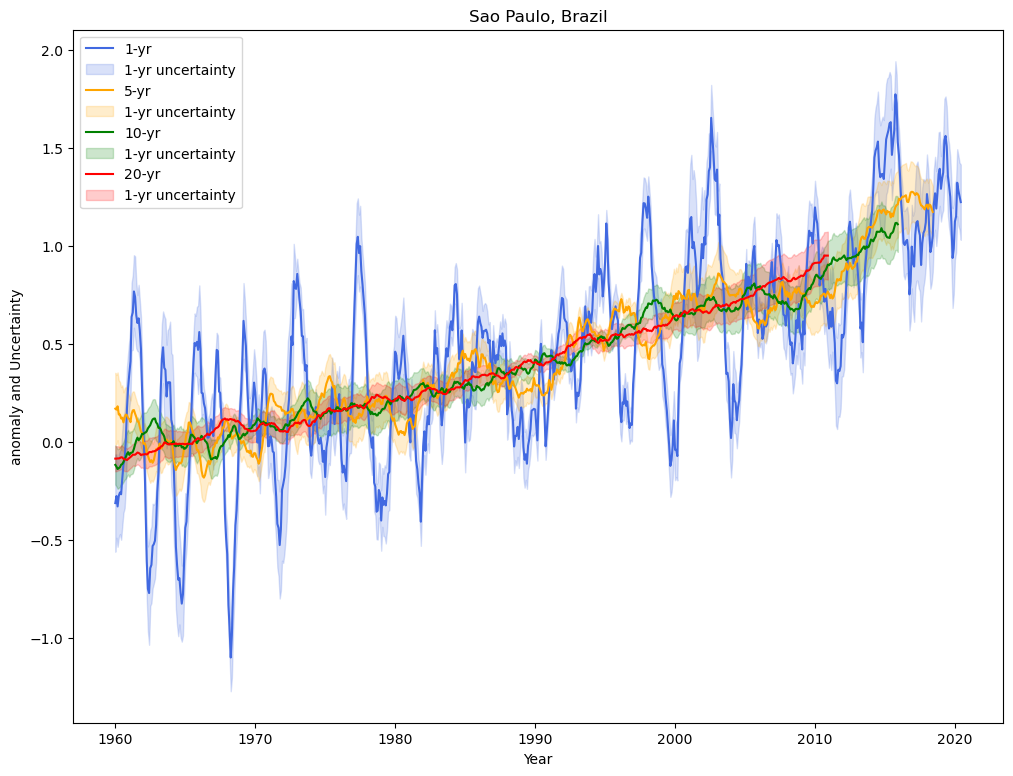

In [19]:
plot_region_uncertainty(saopaulo_data, 'Sao Paulo, Brazil')

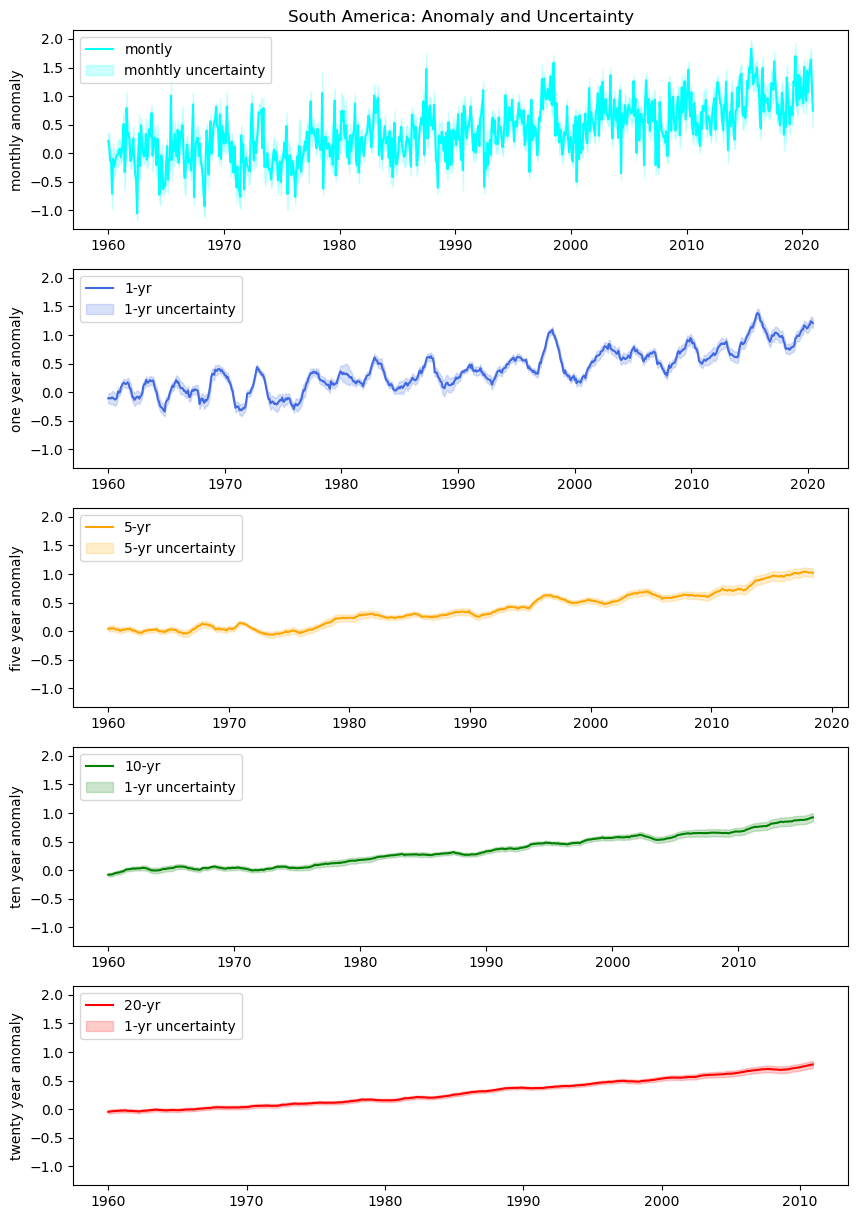

In [23]:
fig, (ax0, ax1, ax2, ax3, ax4)  = plt.subplots(5, figsize=(10,15), sharey=True)
# fig, (ax1, ax2)  = plt.subplots(2, figsize=(10,8), sharey=True)

ax0.plot(south_data['timestamp'], south_data['monthly_anom'], label='montly', color='cyan')
ax0.fill_between(south_data.timestamp,
                 south_data['monthly_anom'] - south_data['monthly_unc'], 
                 south_data['monthly_anom'] + south_data['monthly_unc'], 
                 color='cyan', alpha=0.2, label='monhtly uncertainty')
ax0.legend(loc=2)

ax1.plot(south_data['timestamp'], south_data['one_yr_anom'], label='1-yr', color='royalblue')
ax1.fill_between(south_data.timestamp,
                 south_data['one_yr_anom'] - south_data['one_yr_unc'], 
                 south_data['one_yr_anom'] + south_data['one_yr_unc'], 
                 color='royalblue', alpha=0.2, label='1-yr uncertainty')
ax1.legend(loc=2)

ax2.plot(south_data['timestamp'], south_data['five_yr_anom'], label='5-yr', color='orange')
ax2.fill_between(south_data.timestamp,
                 south_data['five_yr_anom'] - south_data['five_yr_unc'], 
                 south_data['five_yr_anom'] + south_data['five_yr_unc'], 
                 color='orange', alpha=0.2, label='5-yr uncertainty')
ax2.legend(loc=2)

ax3.plot(south_data['timestamp'], south_data['ten_yr_anom'], label='10-yr', color='green')
ax3.fill_between(south_data.timestamp,
                 south_data['ten_yr_anom'] - south_data['ten_yr_unc'], 
                 south_data['ten_yr_anom'] + south_data['ten_yr_unc'], 
                 color='green', alpha=0.2, label='1-yr uncertainty')
ax3.legend(loc=2)

ax4.plot(south_data['timestamp'], south_data['twenty_yr_anom'], label='20-yr', color='red')
ax4.fill_between(south_data.timestamp,
                 south_data['twenty_yr_anom'] - south_data['twenty_yr_unc'], 
                 south_data['twenty_yr_anom'] + south_data['twenty_yr_unc'], 
                 color='red', alpha=0.2, label='1-yr uncertainty')
ax4.legend(loc=2)

ax0.set_title('South America: Anomaly and Uncertainty')

ax0.set_ylabel('monthly anomaly')
ax1.set_ylabel('one year anomaly')
ax2.set_ylabel('five year anomaly')
ax3.set_ylabel('ten year anomaly')
ax4.set_ylabel('twenty year anomaly')

plt.show()

### Explore seasonality 

In [24]:

month_to_season = {
    1: 'summer', 2: 'summer', 3: 'autumn', 4: 'autumn', 5: 'autumn',
    6: 'winter', 7: 'winter', 8: 'winter', 9: 'spring', 10: 'spring',
    11: 'spring', 12: 'summer'
}

# Add the season column using the mapping
south_data['season'] = south_data['month'].map(month_to_season)

south_data

year  month  monthly_anom  monthly_unc  one_yr_anom  one_yr_unc  \
1248  1960      1         0.216        0.147       -0.107       0.088   
1249  1960      2         0.119        0.234       -0.101       0.090   
1250  1960      3        -0.124        0.112       -0.107       0.096   
1251  1960      4        -0.157        0.205       -0.107       0.100   
1252  1960      5        -0.706        0.268       -0.089       0.112   
...    ...    ...           ...          ...          ...         ...   
1975  2020      8         1.344        0.213          NaN         NaN   
1976  2020      9         1.514        0.182          NaN         NaN   
1977  2020     10         1.636        0.208          NaN         NaN   
1978  2020     11         1.182        0.208          NaN         NaN   
1979  2020     12         0.746        0.300          NaN         NaN   

      timestamp  five_yr_anom  five_yr_unc  ten_yr_anom  ten_yr_unc  \
1248 1960-01-01         0.042        0.044       -0.080       0.032   
1249 1960-02-01         0.041        0.043       -0.077       0.031   
1250 1960-03-01         0.052        0.049       -0.077       0.031   
1251 1960-04-01         0.045        0.052       -0.075       0.032   
1252 1960-05-01         0.053        0.052       -0.072       0.032   
...         ...           ...          ...          ...         ...   
1975 2020-08-01           NaN          NaN          NaN         NaN   
1976 2020-09-01           NaN          NaN          NaN         NaN   
1977 2020-10-01           NaN          NaN          NaN         NaN   
1978 2020-11-01           NaN          NaN          NaN         NaN   
1979 2020-12-01           NaN          NaN          NaN         NaN   

      twenty_yr_anom  twenty_yr_unc  season  
1248          -0.046          0.033  summer  
1249          -0.044          0.033  summer  
1250          -0.041          0.032  autumn  
1251          -0.037          0.032  autumn  
1252          -0.036          0.032  autumn  
...              ...            ...     ...  
1975             NaN            NaN  winter  
1976             NaN            NaN  spring  
1977             NaN            NaN  spring  
1978             NaN            NaN  spring  
1979             NaN            NaN  summer  

[732 rows x 14 columns]

season    autumn    spring    summer    winter
year                                          
1960   -0.329000 -0.039667  0.128000 -0.167000
1961    0.238333  0.303333 -0.042000  0.120000
1962   -0.068667  0.205333  0.059000 -0.540667
1963    0.062000  0.319333  0.034000  0.258000
1964    0.045000 -0.445667 -0.018000 -0.449000
...          ...       ...       ...       ...
2016    1.000667  0.876667  1.245333  1.058333
2017    0.927000  1.006000  0.856667  1.307333
2018    0.885333  1.049333  0.529333  0.498333
2019    1.038667  1.214667  0.867333  1.147000
2020    1.191667  1.444000  0.918000  1.284667

[61 rows x 4 columns]


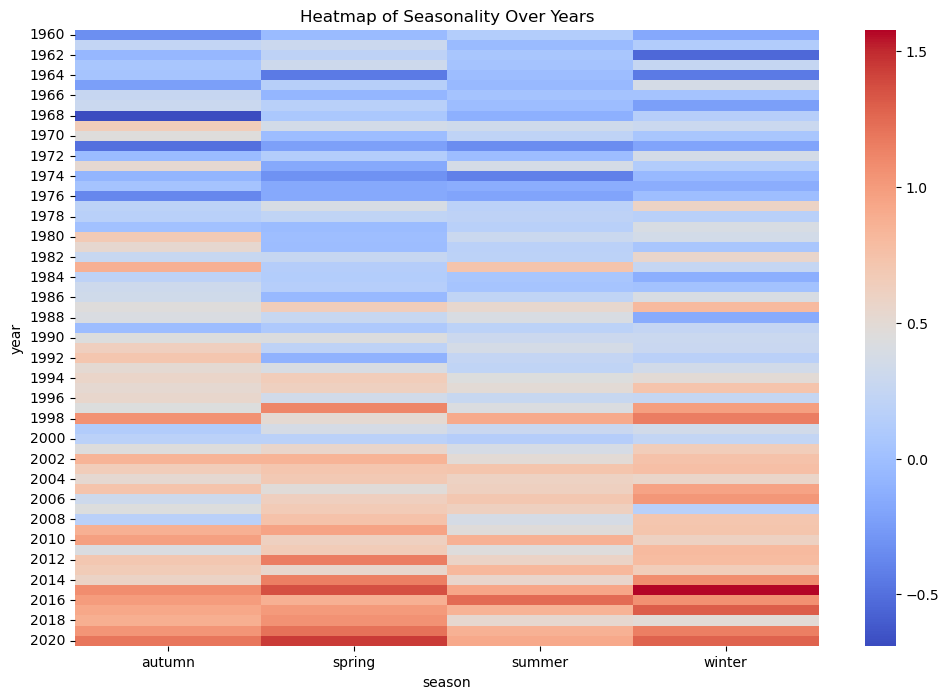

In [25]:
season_groups = south_data.groupby(['year','season'])['monthly_anom'].mean().unstack()
print(season_groups)

# plt.figure(figsize=(12,8))
# season_groups.plot(kind='bar')

# pivot_season_df = season_groups.pivot('year', 'season', 'monthly_anom')

plt.figure(figsize=(12,8))
sns.heatmap(season_groups, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Seasonality Over Years')
plt.show()

/var/folders/d9/wfbhg4ns6gjcszk_j7vl59rw0000gn/T/ipykernel_5236/338849066.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



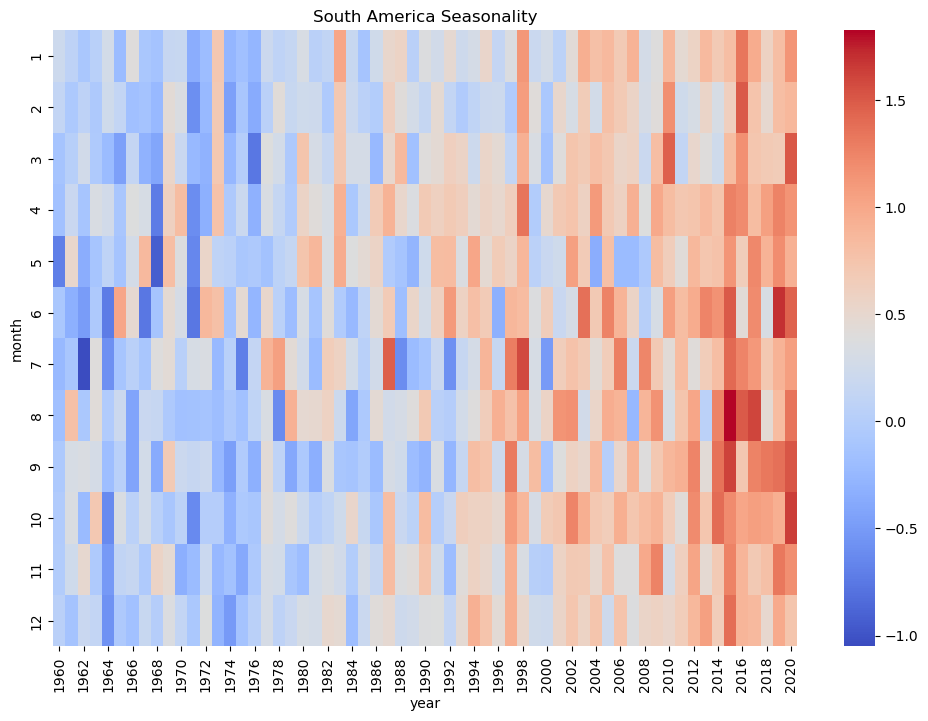

In [ ]:
pivot_south_df = south_data.pivot('month', 'year', 'monthly_anom')

plt.figure(figsize=(12,8))
sns.heatmap(pivot_south_df, cmap='coolwarm', fmt=".2f")
plt.title('South America Seasonality')
plt.show()

/var/folders/d9/wfbhg4ns6gjcszk_j7vl59rw0000gn/T/ipykernel_5236/421614152.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.

/var/folders/d9/wfbhg4ns6gjcszk_j7vl59rw0000gn/T/ipykernel_5236/421614152.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.

/var/folders/d9/wfbhg4ns6gjcszk_j7vl59rw0000gn/T/ipykernel_5236/421614152.py:3: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



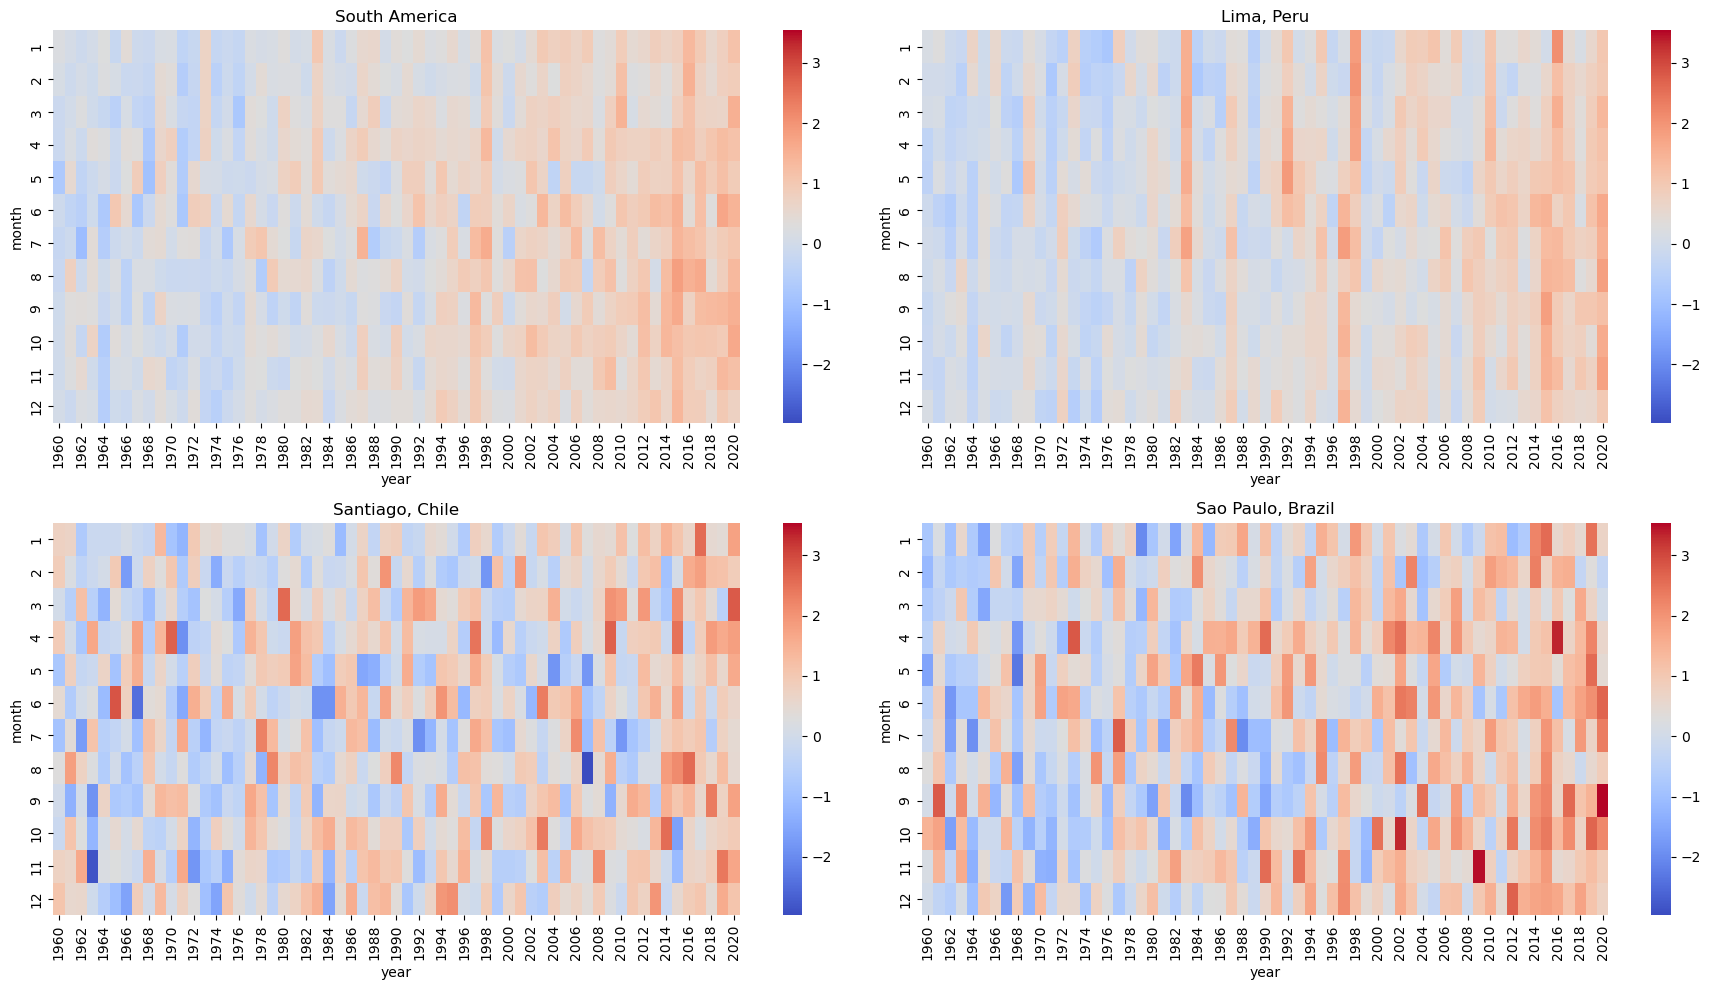

In [ ]:
pivot_lima_df = lima_data.pivot('month', 'year', 'monthly_anom')
pivot_santiago_df = santiago_data.pivot('month', 'year', 'monthly_anom')
pivot_saopaulo_df = saopaulo_data.pivot('month', 'year', 'monthly_anom')

fig, axes = plt.subplots(2, 2, figsize=(18,10))

vmin = min(south_data['monthly_anom'].min(), lima_data['monthly_anom'].min(), santiago_data['monthly_anom'].min(), saopaulo_data['monthly_anom'].min())
vmax = max(south_data['monthly_anom'].max(), lima_data['monthly_anom'].max(), santiago_data['monthly_anom'].max(), saopaulo_data['monthly_anom'].max())

sns.heatmap(pivot_south_df, cmap='coolwarm', vmin=vmin, vmax=vmax, ax=axes[0,0])
axes[0,0].set_title('South America')

sns.heatmap(pivot_lima_df, cmap='coolwarm', vmin=vmin, vmax=vmax, ax=axes[0,1])
axes[0,1].set_title('Lima, Peru')

sns.heatmap(pivot_santiago_df, cmap='coolwarm', vmin=vmin, vmax=vmax, ax=axes[1,0])
axes[1,0].set_title('Santiago, Chile')

sns.heatmap(pivot_saopaulo_df, cmap='coolwarm', vmin=vmin, vmax=vmax, ax=axes[1,1])
axes[1,1].set_title('Sao Paulo, Brazil')

plt.tight_layout()

plt.show()

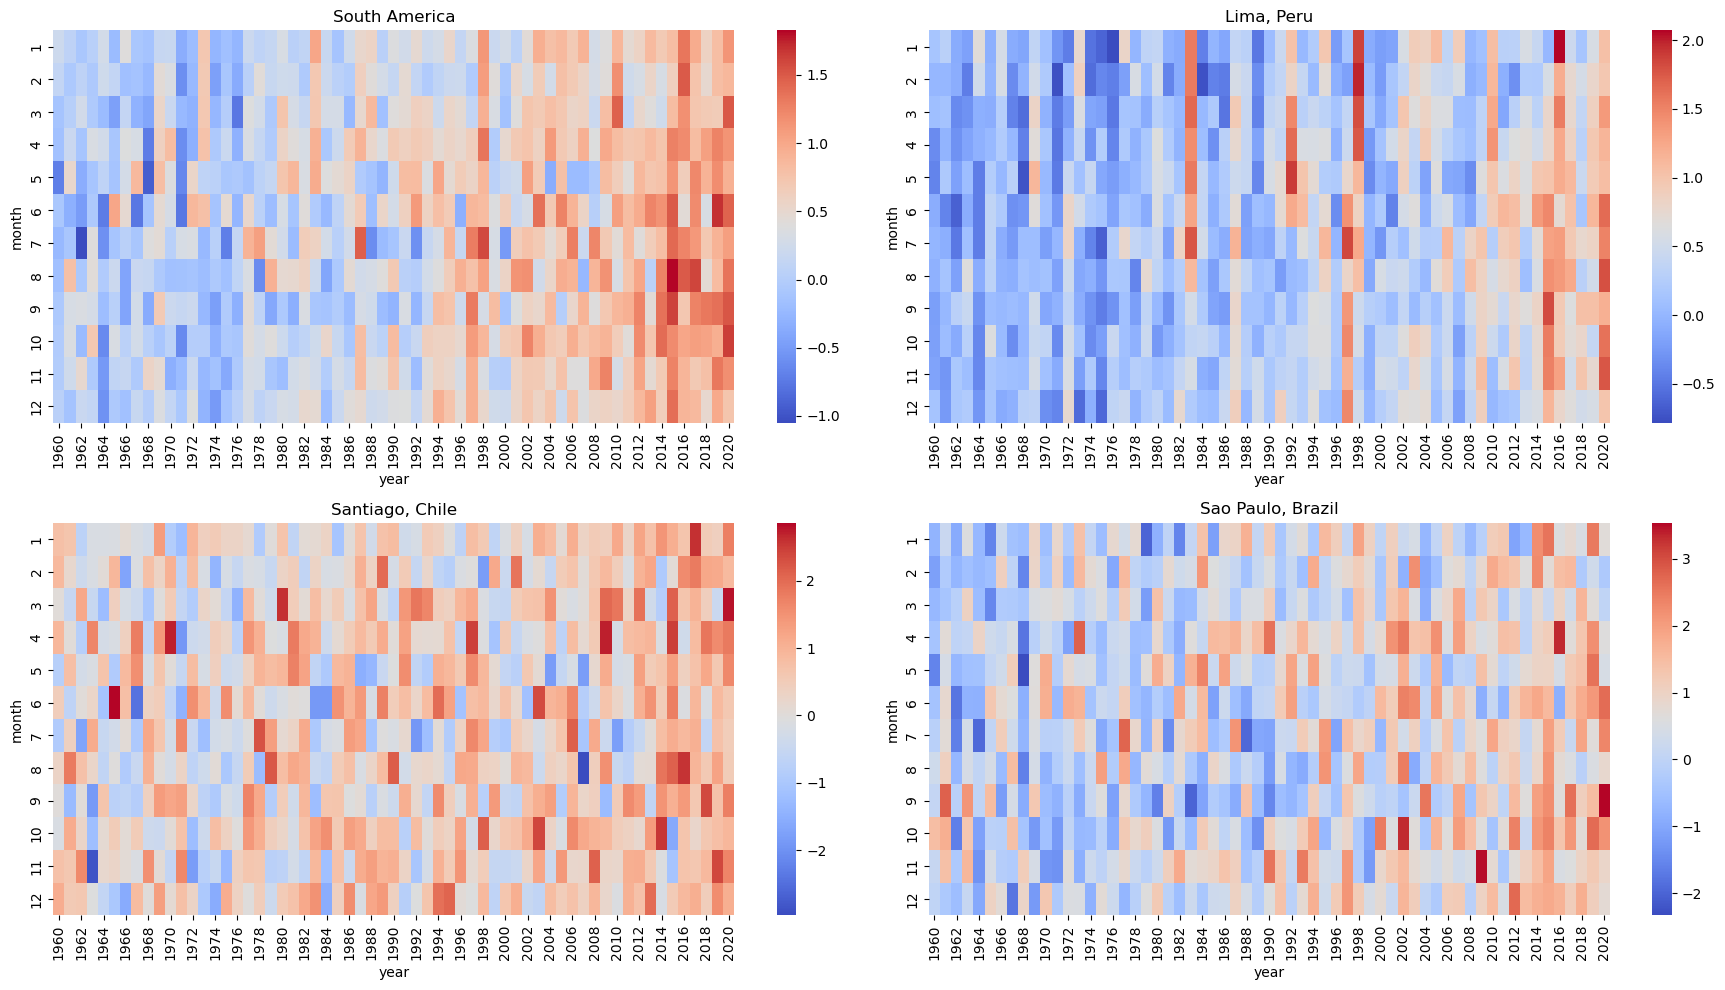

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(18,10))

vmin = min(south_data['monthly_anom'].min(), lima_data['monthly_anom'].min(), santiago_data['monthly_anom'].min(), saopaulo_data['monthly_anom'].min())
vmax = max(south_data['monthly_anom'].max(), lima_data['monthly_anom'].max(), santiago_data['monthly_anom'].max(), saopaulo_data['monthly_anom'].max())

sns.heatmap(pivot_south_df, cmap='coolwarm', ax=axes[0,0])
axes[0,0].set_title('South America')

sns.heatmap(pivot_lima_df, cmap='coolwarm', ax=axes[0,1])
axes[0,1].set_title('Lima, Peru')

sns.heatmap(pivot_santiago_df, cmap='coolwarm', ax=axes[1,0])
axes[1,0].set_title('Santiago, Chile')

sns.heatmap(pivot_saopaulo_df, cmap='coolwarm',ax=axes[1,1])
axes[1,1].set_title('Sao Paulo, Brazil')

plt.tight_layout()

plt.show()

#### Explore mapping


In [ ]:
# Sample data
data = {
    'city': ['Sao Paulo', 'Lima', 'Santiago'],
    'lat': [-23.31, -12.0464, -33.4489],
    'lon': [-46.31, -77.0428, -70.6693],
    'population': [2890000, 9674755, 5743719]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Create a scatter mapbox plot
fig = px.scatter_mapbox(
    df, 
    lat="lat", 
    lon="lon", 
    hover_name="city", 
    hover_data=["population"],
    color_discrete_sequence=["fuchsia"], 
    zoom=3, 
    height=500
)

# Set the mapbox access token
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

# Show the plot
fig.show()

In [ ]:
# example map plot with plotly express and choropleth
data = {
    'country': ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela'],
    'values': [100, 100, 20, 25, 100, 100, 100, 100, 50, 100, 100, 100]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Create a choropleth map
fig = px.choropleth(
    df, 
    locations='country', 
    locationmode='country names',
    color='values',
    hover_name='country', 
    color_continuous_scale=px.colors.sequential.Plasma,
    projection='mercator',
    title='Sample Data of South America'
)

# Update layout for better visualization
fig.update_geos(fitbounds="locations", visible=False)

# Show the map
fig.show()

### Testing Cells Below
These were cells that I used to try and see if there was any useful trends, or testing methods to do something.

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=south_america_summer['timestamp'], y=south_america_summer['monthly_anom'], name='South America - summer') )
fig.add_trace(go.Scatter(x=south_america_autumn['timestamp'], y=south_america_autumn['monthly_anom'], name='South America - autumn') )
fig.add_trace(go.Scatter(x=south_america_winter['timestamp'], y=south_america_winter['monthly_anom'], name='South America - winter') )
fig.add_trace(go.Scatter(x=south_america_spring['timestamp'], y=south_america_spring['monthly_anom'], name='South America - spring') )

fig.add_trace(go.Scatter(x=lima_summer['timestamp'], y=lima_summer['monthly_anom'], name='Lima - summer') )
fig.add_trace(go.Scatter(x=lima_autumn['timestamp'], y=lima_autumn['monthly_anom'], name='Lima - autumn') )
fig.add_trace(go.Scatter(x=lima_winter['timestamp'], y=lima_winter['monthly_anom'], name='Lima - winter') )
fig.add_trace(go.Scatter(x=lima_spring['timestamp'], y=lima_spring['monthly_anom'], name='Lima - spring') )

fig.add_trace(go.Scatter(x=santiago_summer['timestamp'], y=santiago_summer['monthly_anom'], name='Santiago - summer') )
fig.add_trace(go.Scatter(x=santiago_autumn['timestamp'], y=santiago_autumn['monthly_anom'], name='Santiago - autumn') )
fig.add_trace(go.Scatter(x=santiago_winter['timestamp'], y=santiago_winter['monthly_anom'], name='Santiago - winter') )
fig.add_trace(go.Scatter(x=santiago_spring['timestamp'], y=santiago_spring['monthly_anom'], name='Santiago - spring') )

fig.add_trace(go.Scatter(x=saopaulo_summer['timestamp'], y=saopaulo_summer['monthly_anom'], name='Sao Paulo - summer') )
fig.add_trace(go.Scatter(x=saopaulo_autumn['timestamp'], y=saopaulo_autumn['monthly_anom'], name='Sao Paulo - autumn') )
fig.add_trace(go.Scatter(x=saopaulo_winter['timestamp'], y=saopaulo_winter['monthly_anom'], name='Sao Paulo - winter') )
fig.add_trace(go.Scatter(x=saopaulo_spring['timestamp'], y=saopaulo_spring['monthly_anom'], name='Sao Paulo - spring') )

fig.update_layout(title='South America Data',
                  xaxis_title='Year',
                  yaxis_title='Monthly anomaly',
                  legend_title='Legend')

fig.show()

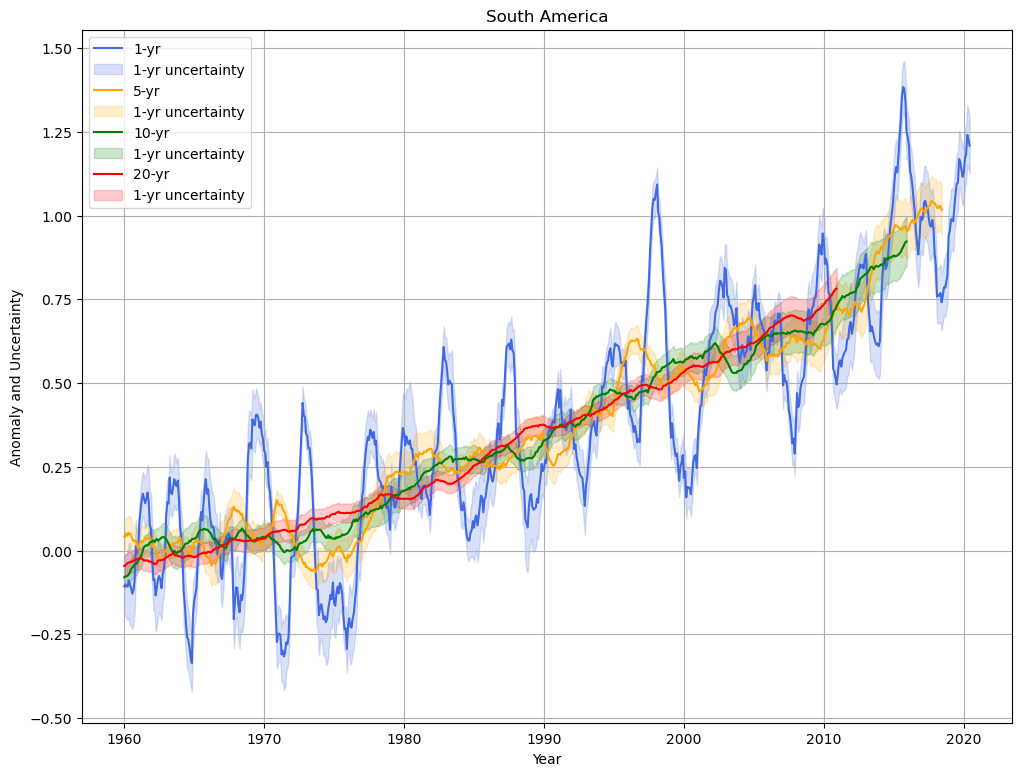

In [ ]:
fig, ax = plt.subplots(figsize=(12,9))

# plt.plot(south_data['timestamp'], south_data['monthly_anom'], label='monthly', color='cyan')
# plt.fill_between(south_data.timestamp,
#                  south_data['monthly_anom'] - south_data['monthly_unc'], 
#                  south_data['monthly_anom'] + south_data['monthly_unc'], 
#                  color='cyan', alpha=0.2, label='monthly uncertainty')

plt.plot(south_data['timestamp'], south_data['one_yr_anom'], label='1-yr', color='royalblue')
plt.fill_between(south_data.timestamp,
                 south_data['one_yr_anom'] - south_data['one_yr_unc'], 
                 south_data['one_yr_anom'] + south_data['one_yr_unc'], 
                 color='royalblue', alpha=0.2, label='1-yr uncertainty')


plt.plot(south_data['timestamp'], south_data['five_yr_anom'], label='5-yr', color='orange')
plt.fill_between(south_data.timestamp,
                 south_data['five_yr_anom'] - south_data['five_yr_unc'], 
                 south_data['five_yr_anom'] + south_data['five_yr_unc'], 
                 color='orange', alpha=0.2, label='1-yr uncertainty')

plt.plot(south_data['timestamp'], south_data['ten_yr_anom'], label='10-yr', color='green')
plt.fill_between(south_data.timestamp,
                 south_data['ten_yr_anom'] - south_data['ten_yr_unc'], 
                 south_data['ten_yr_anom'] + south_data['ten_yr_unc'], 
                 color='green', alpha=0.2, label='1-yr uncertainty')

plt.plot(south_data['timestamp'], south_data['twenty_yr_anom'], label='20-yr', color='red')
plt.fill_between(south_data.timestamp,
                 south_data['twenty_yr_anom'] - south_data['twenty_yr_unc'], 
                 south_data['twenty_yr_anom'] + south_data['twenty_yr_unc'], 
                 color='red', alpha=0.2, label='1-yr uncertainty')
plt.legend(loc=2)

plt.grid()
plt.title('South America')
plt.ylabel('Anomaly and Uncertainty')
plt.xlabel('Year')

plt.show()

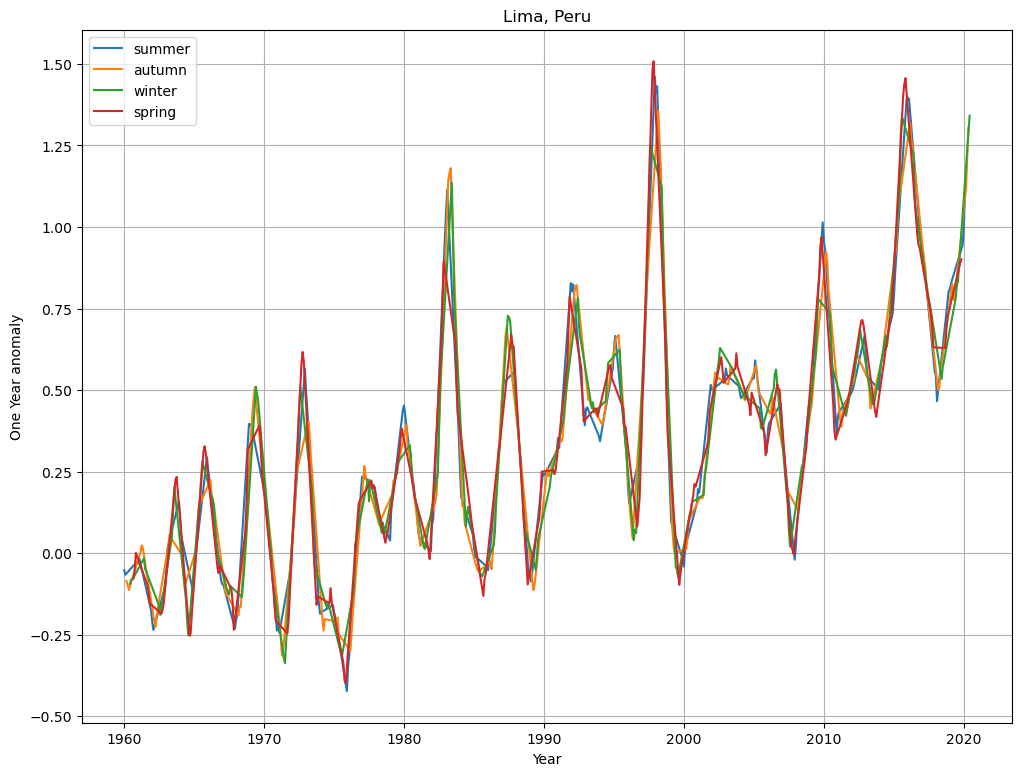

In [ ]:
fig, ax = plt.subplots(figsize=(12,9))

plt.plot(lima_summer['timestamp'], lima_summer['one_yr_anom'])
plt.plot(lima_autumn['timestamp'], lima_autumn['one_yr_anom'])
plt.plot(lima_winter['timestamp'], lima_winter['one_yr_anom'])
plt.plot(lima_spring['timestamp'], lima_spring['one_yr_anom'])

plt.title('Lima, Peru')
plt.xlabel('Year')
plt.ylabel('One Year anomaly')
plt.legend(['summer', 'autumn', 'winter', 'spring'])
plt.grid()

plt.show()

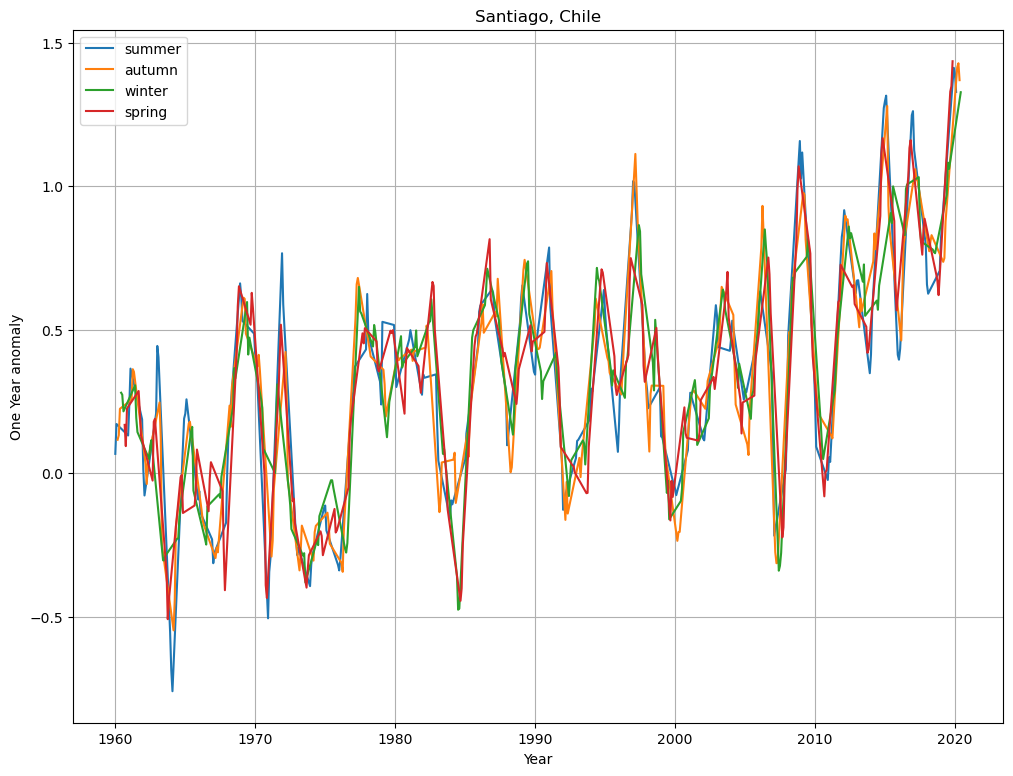

In [ ]:
fig, ax = plt.subplots(figsize=(12,9))

plt.plot(santiago_summer['timestamp'], santiago_summer['one_yr_anom'])
plt.plot(santiago_autumn['timestamp'], santiago_autumn['one_yr_anom'])
plt.plot(santiago_winter['timestamp'], santiago_winter['one_yr_anom'])
plt.plot(santiago_spring['timestamp'], santiago_spring['one_yr_anom'])

plt.title('Santiago, Chile')
plt.xlabel('Year')
plt.ylabel('One Year anomaly')
plt.legend(['summer', 'autumn', 'winter', 'spring'])
plt.grid()

plt.show()

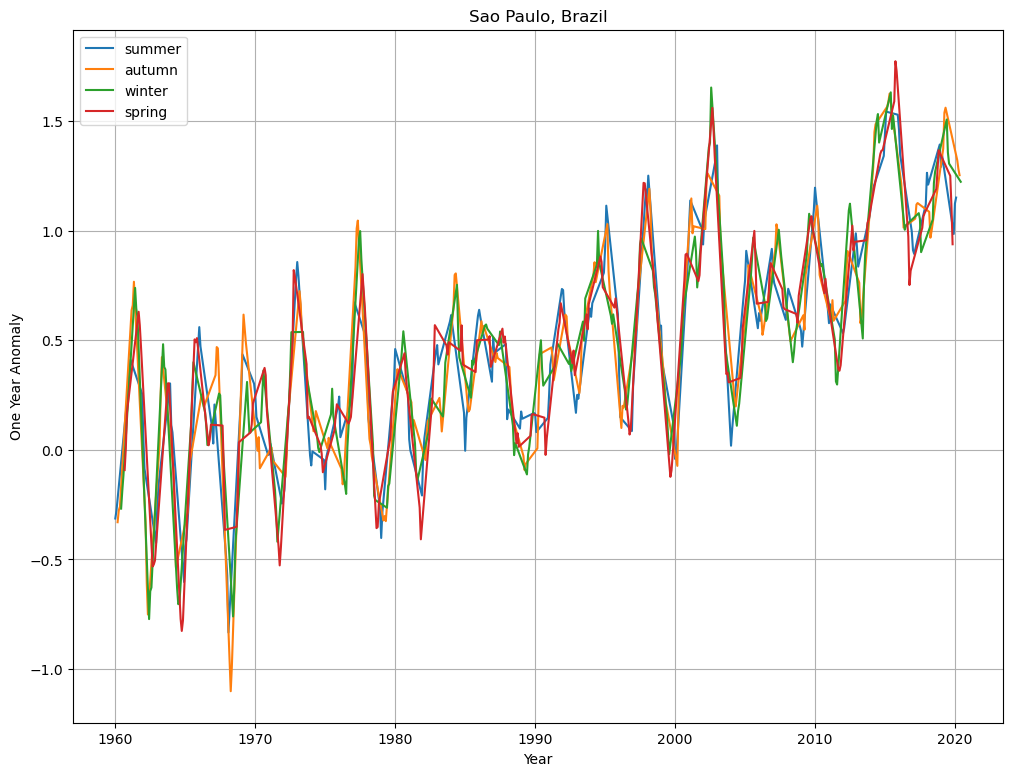

In [ ]:
fig, ax = plt.subplots(figsize=(12,9))

plt.plot(saopaulo_summer['timestamp'], saopaulo_summer['one_yr_anom'])
plt.plot(saopaulo_autumn['timestamp'], saopaulo_autumn['one_yr_anom'])
plt.plot(saopaulo_winter['timestamp'], saopaulo_winter['one_yr_anom'])
plt.plot(saopaulo_spring['timestamp'], saopaulo_spring['one_yr_anom'])

plt.title('Sao Paulo, Brazil')
plt.xlabel('Year')
plt.ylabel('One Year Anomaly')
plt.legend(['summer', 'autumn', 'winter', 'spring'])
plt.grid()

plt.show()

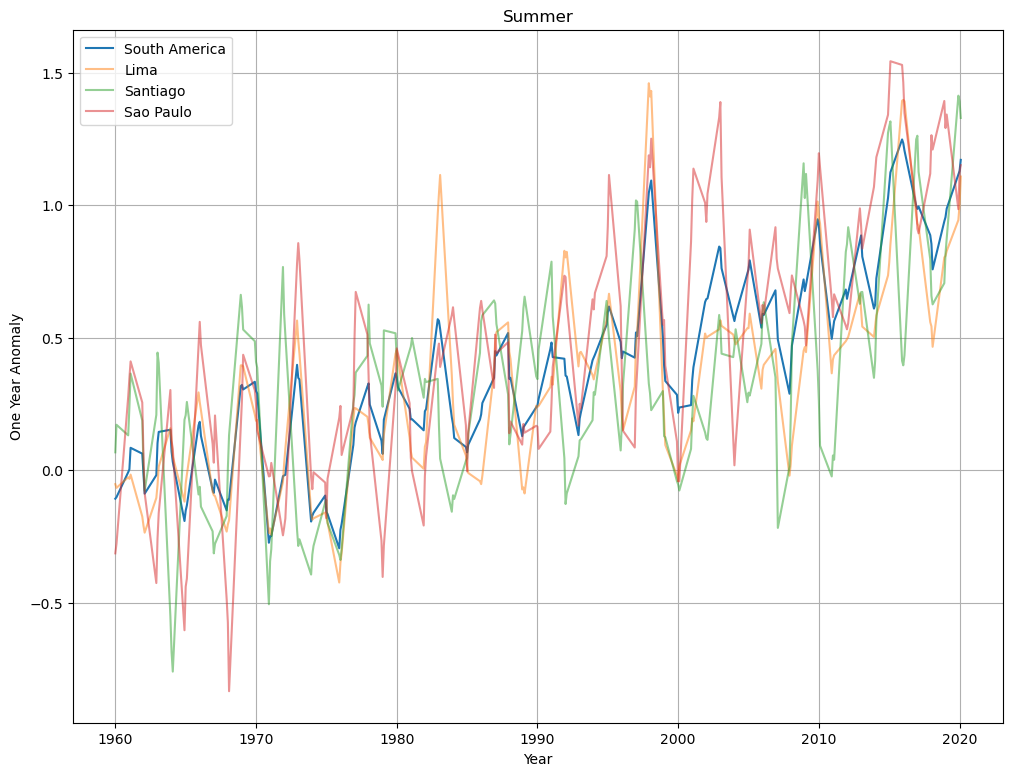

In [ ]:
fig, ax = plt.subplots(figsize=(12,9))

plt.plot(south_america_summer['timestamp'], south_america_summer['one_yr_anom'])
plt.plot(lima_summer['timestamp'], lima_summer['one_yr_anom'], alpha=0.5)
plt.plot(santiago_summer['timestamp'], santiago_summer['one_yr_anom'], alpha=0.5)
plt.plot(saopaulo_summer['timestamp'], saopaulo_summer['one_yr_anom'], alpha=0.5)

plt.title('Summer')
plt.xlabel('Year')
plt.ylabel('One Year Anomaly')
plt.legend(['South America', 'Lima', 'Santiago', 'Sao Paulo'])
plt.grid()

plt.show()

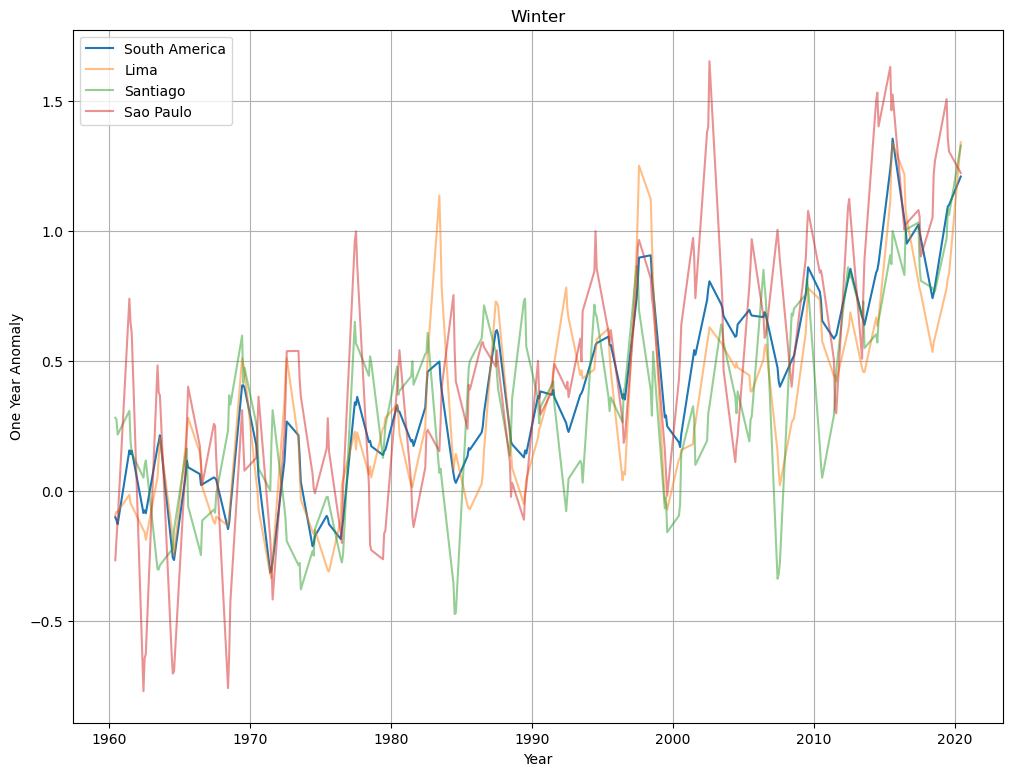

In [ ]:
fig, ax = plt.subplots(figsize=(12,9))

plt.plot(south_america_winter['timestamp'], south_america_winter['one_yr_anom'])
plt.plot(lima_winter['timestamp'], lima_winter['one_yr_anom'], alpha=0.5)
plt.plot(santiago_winter['timestamp'], santiago_winter['one_yr_anom'], alpha=0.5)
plt.plot(saopaulo_winter['timestamp'], saopaulo_winter['one_yr_anom'], alpha=0.5)

plt.title('Winter')
plt.xlabel('Year')
plt.ylabel('One Year Anomaly')
plt.legend(['South America', 'Lima', 'Santiago', 'Sao Paulo'])
plt.grid()

plt.show()